In [31]:
!pip install snowflake-connector-python
!pip install watchdog

In [32]:
import snowflake.connector

conn = snowflake.connector.connect(
    user='rutikekre',
    password='Capgemini@123',
    account='xx49197.ap-southeast-1',
    warehouse='hackathon',
    database='airbnb',
    schema='airbnb_schema'
)

cursor = conn.cursor()

print('Connection successfull and cursor object created.')

Connection successfull and cursor object created.


In [33]:
# testing database
query = 'SELECT count(*) From newyork_data;'
cursor.execute(query)

print('Execution Successfull')

Execution Successfull


In [34]:
cursor.fetchall()

[(48898,)]

In [35]:
query = 'SELECT * From newyork_data;'
cursor.execute(query)

Creating Dataframe

In [36]:
df = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
print('Dataframe created successfully..')

Dataframe created successfully..


In [37]:
df.head()

,ID,NAME,HOST_ID,HOST_NAME,NEIGHBOURHOOD_GROUP,NEIGHBOURHOOD,LATITUDE,LONGITUDE,ROOM_TYPE,PRICE,MINIMUM_NIGHTS,NUMBER_OF_REVIEWS,LAST_REVIEW,REVIEWS_PER_MONTH,CALCULATED_HOST_LISTINGS_COUNT,AVAILABILITY_365
0,8877245,Cozy Entire Floor of Brownstone,488459,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,one bed,89,1,270,2019-07-05,4.64,1,194
1,1819002,Kadam Niwas,488459,Bala Kadam,Brooklyn,Clinton Hill,40.68514,-73.95976,one bed,89,0,270,2019-07-05,4.64,1,720
2,1819432,Abhidas Niwas,488459,Devidas,Brooklyn,Clinton Hill,82.68514,-93.95976,one bed,89,0,270,2019-07-05,4.64,1,720
3,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
4,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


Code for detecting Minimum Nights Availability

In [38]:
import pandas as pd
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.application import MIMEApplication

# Load your Airbnb dataset
# Replace 'your_dataset.csv' with the actual file path or URL
# df = pd.read_csv('your_dataset.csv')

# Filter data where minimum nights are less than 1
minimum_nights_filtered = df[df['MINIMUM_NIGHTS'] < 1]

# Save the filtered data to a CSV file
csv_file_path = 'minimum_nights_filtered.csv'
minimum_nights_filtered.to_csv(csv_file_path, index=False)

# Email configuration
sender_email = 'ankushmulewar51@gmail.com'  # Replace with your email address
receiver_email = 'ritikekre510@gmail.com'  # Replace with recipient's email address
subject = 'Error Occured in Minimum Nights Column'

# Create the email message
msg = MIMEMultipart()
msg['From'] = sender_email
msg['To'] = receiver_email
msg['Subject'] = subject

# Attach the CSV file
with open(csv_file_path, 'rb') as file:
    part = MIMEApplication(file.read(), Name='minimum_nights_filtered.csv')

# Add header as key/value pair to attachment part
part['Content-Disposition'] = f'attachment; filename={csv_file_path}'
msg.attach(part)

# Attach a plain text message
text = "Please find the attached CSV file containing data with minimum nights less than 1."
msg.attach(MIMEText(text, 'plain'))

# Connect to the SMTP server (e.g., for Gmail)
smtp_server = 'smtp.gmail.com'  # Replace with your SMTP server
smtp_port = 587
smtp_username = 'ankushmulewar51@gmail.com'  # Replace with your email address
smtp_password = 'clzv saju jssm ntzk'  # Replace with your email password


with smtplib.SMTP(smtp_server, smtp_port) as server:
    server.starttls()
    server.login(smtp_username, smtp_password)
    server.sendmail(sender_email, receiver_email, msg.as_string())

print(f"Email sent successfully to {receiver_email} with the filtered data.")



Email sent successfully to ritikekre510@gmail.com with the filtered data.


Code for detecting Availability of Hotels

In [39]:
import pandas as pd
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.application import MIMEApplication

# Filter data where availability is either 0 or more than 365 days
availability_filtered = df[(df['AVAILABILITY_365'] == 0) | (df['AVAILABILITY_365'] > 365)]

# Save the filtered data to a CSV file
csv_file_path = 'availability_filtered.csv'
availability_filtered.to_csv(csv_file_path, index=False)

# Email configuration (repeat the same email setup code as above)
subject = 'Alert: Availability Issue Detected'

# Create the email message
msg = MIMEMultipart()
msg['From'] = sender_email
msg['To'] = receiver_email
msg['Subject'] = subject

# Attach the CSV file
with open(csv_file_path, 'rb') as file:
    part = MIMEApplication(file.read(), Name='availability_filtered.csv')

# Add header as key/value pair to attachment part
part['Content-Disposition'] = f'attachment; filename={csv_file_path}'
msg.attach(part)

# Attach a plain text message
text = "Please find the attached CSV file containing data with availability issues."
msg.attach(MIMEText(text, 'plain'))

# Connect to the SMTP server (e.g., for Gmail)
with smtplib.SMTP(smtp_server, smtp_port) as server:
    server.starttls()
    server.login(smtp_username, smtp_password)
    server.sendmail(sender_email, receiver_email, msg.as_string())

print(f"Email sent successfully to {receiver_email} with the filtered data.")

Email sent successfully to ritikekre510@gmail.com with the filtered data.


Code for detecting Latitude and Longitude

In [40]:
# Define the latitude and longitude range for New York
ny_latitude_range = (40.4774, 40.9176)  # Adjust as needed
ny_longitude_range = (-74.2591, -73.7004)  # Adjust as needed

# Filter data based on latitude and longitude conditions
location_filtered = df[~((df['LATITUDE'].between(*ny_latitude_range)) & (df['LONGITUDE'].between(*ny_longitude_range)))]

# Save the filtered data to a CSV file
csv_file_path = 'location_filtered.csv'
location_filtered.to_csv(csv_file_path, index=False)

# Email configuration (repeat the same email setup code as above)
subject = 'Alert: Location Issue Detected'

# Create the email message
msg = MIMEMultipart()
msg['From'] = sender_email
msg['To'] = receiver_email
msg['Subject'] = subject

# Attach the CSV file
with open(csv_file_path, 'rb') as file:
    part = MIMEApplication(file.read(), Name='location_filtered.csv')

# Add header as key/value pair to attachment part
part['Content-Disposition'] = f'attachment; filename={csv_file_path}'
msg.attach(part)

# Attach a plain text message
text = "Please find the attached CSV file containing data with availability issues."
msg.attach(MIMEText(text, 'plain'))

# Connect to the SMTP server (e.g., for Gmail)
with smtplib.SMTP(smtp_server, smtp_port) as server:
    server.starttls()
    server.login(smtp_username, smtp_password)
    server.sendmail(sender_email, receiver_email, msg.as_string())

print(f"Email sent successfully to {receiver_email} with the filtered data.")

Email sent successfully to ritikekre510@gmail.com with the filtered data.


Code for visualizing the average price of hotels in each neighborhood

C:\Users\JJATHAR\AppData\Local\Temp\ipykernel_17604\1070780469.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


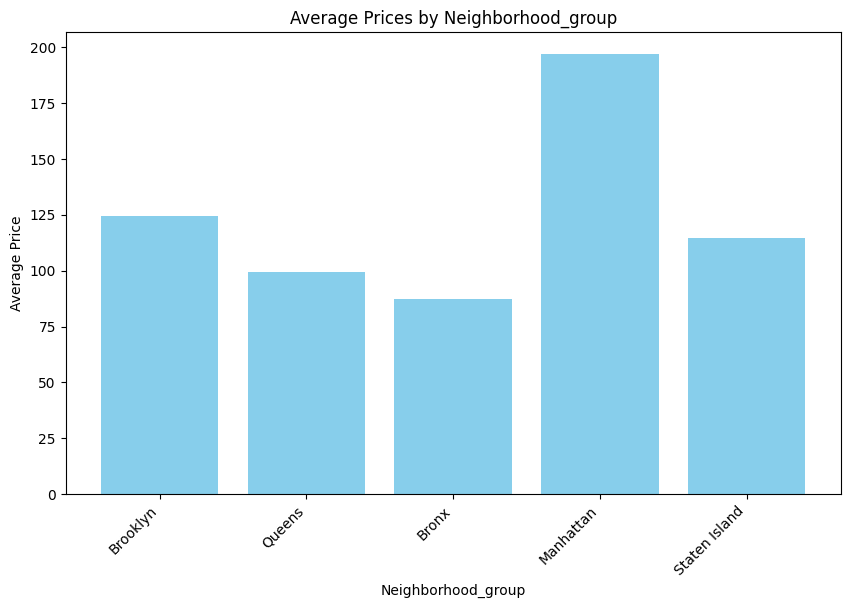

In [41]:
import snowflake.connector
import pandas as pd
import matplotlib.pyplot as plt

# Connect to Snowflake and fetch data
conn = snowflake.connector.connect(
    user='rutikekre',
    password='Capgemini@123',
    account='xx49197.ap-southeast-1',
    warehouse='hackathon',
    database='airbnb',
    schema='airbnb_schema'
)

query = "SELECT NEIGHBOURHOOD_GROUP, AVG(PRICE) AS AVG_PRICE FROM newyork_data GROUP BY NEIGHBOURHOOD_GROUP"
df = pd.read_sql(query, conn)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(df['NEIGHBOURHOOD_GROUP'], df['AVG_PRICE'], color='skyblue')
plt.title('Average Prices by Neighborhood_group')
plt.xlabel('Neighborhood_group')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.show()

# Close the Snowflake connection
conn.close()


C:\Users\JJATHAR\AppData\Local\Temp\ipykernel_17604\3414411398.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


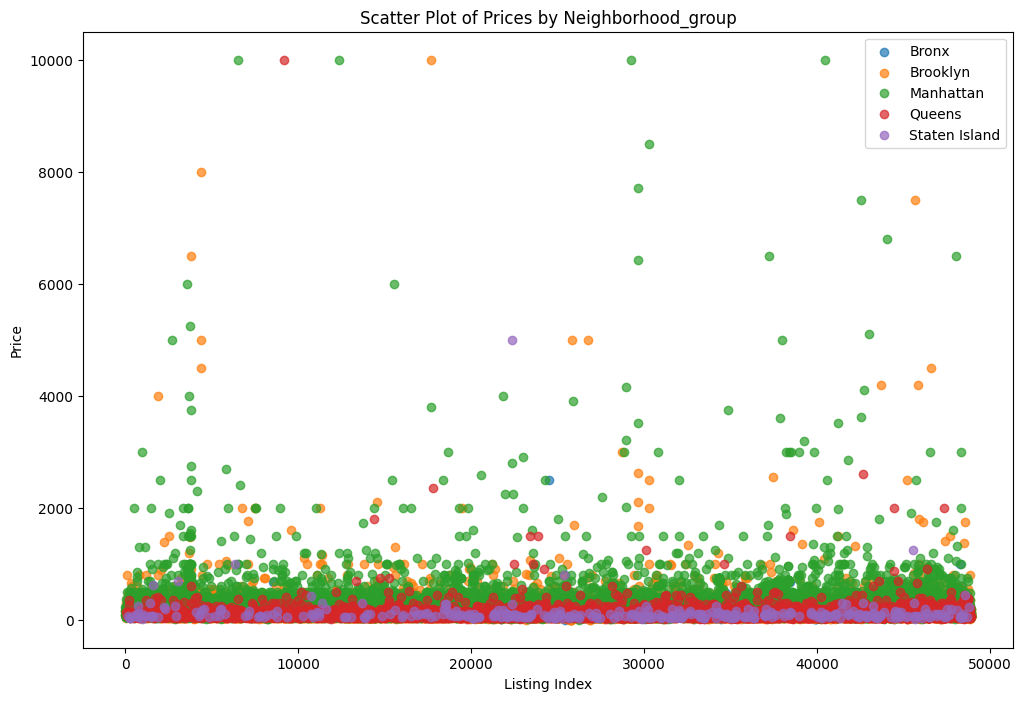

In [42]:
import snowflake.connector
import pandas as pd
import matplotlib.pyplot as plt

# Connect to Snowflake and fetch data
conn = snowflake.connector.connect(
    user='rutikekre',
    password='Capgemini@123',
    account='xx49197.ap-southeast-1',
    warehouse='hackathon',
    database='airbnb',
    schema='airbnb_schema'
)

query = "SELECT NEIGHBOURHOOD_GROUP, PRICE FROM newyork_data"
df = pd.read_sql(query, conn)

# Plotting
plt.figure(figsize=(12, 8))

# Loop through each neighborhood group and plot a scatter plot
for neighborhood_group, group_df in df.groupby('NEIGHBOURHOOD_GROUP'):
    plt.scatter(group_df.index, group_df['PRICE'], label=neighborhood_group, alpha=0.7)

plt.title('Scatter Plot of Prices by Neighborhood_group')
plt.xlabel('Listing Index')
plt.ylabel('Price')
plt.legend()
plt.show()

# Close the Snowflake connection
conn.close()

C:\Users\JJATHAR\AppData\Local\Temp\ipykernel_17604\2409718020.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
C:\Users\JJATHAR\AppData\Local\Temp\ipykernel_17604\2409718020.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_group_df.loc[:, 'outlier'] = model.predict(X)


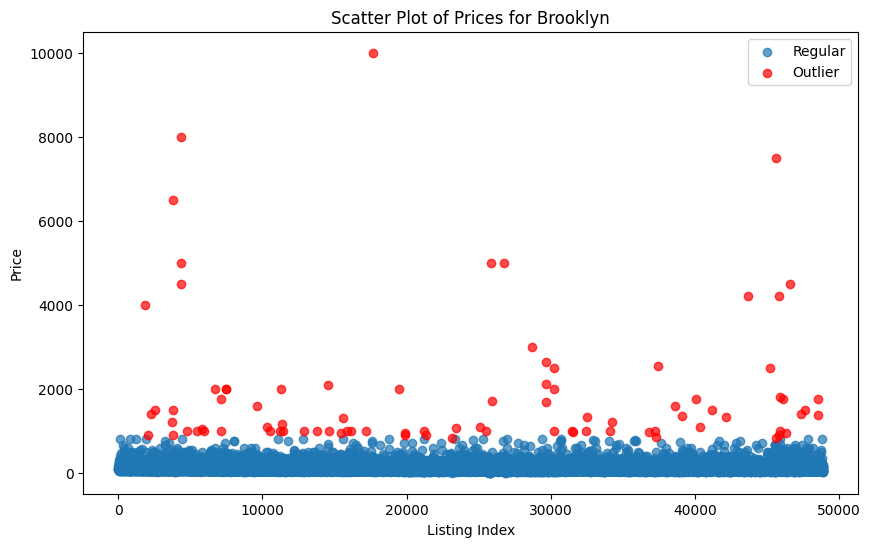

Scatter plot displayed for Brooklyn neighborhood group.


C:\Users\JJATHAR\AppData\Local\Temp\ipykernel_17604\2409718020.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_group_df.loc[:, 'outlier'] = model.predict(X)


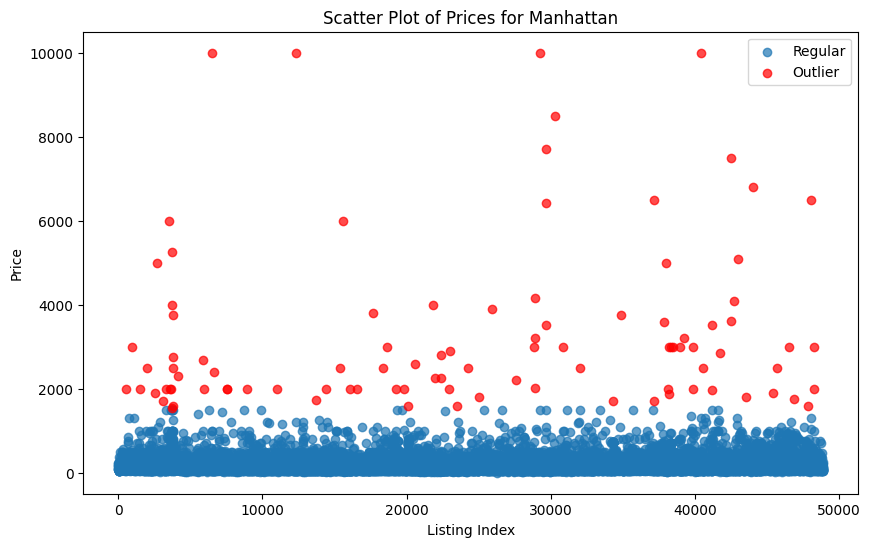

Scatter plot displayed for Manhattan neighborhood group.


C:\Users\JJATHAR\AppData\Local\Temp\ipykernel_17604\2409718020.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_group_df.loc[:, 'outlier'] = model.predict(X)


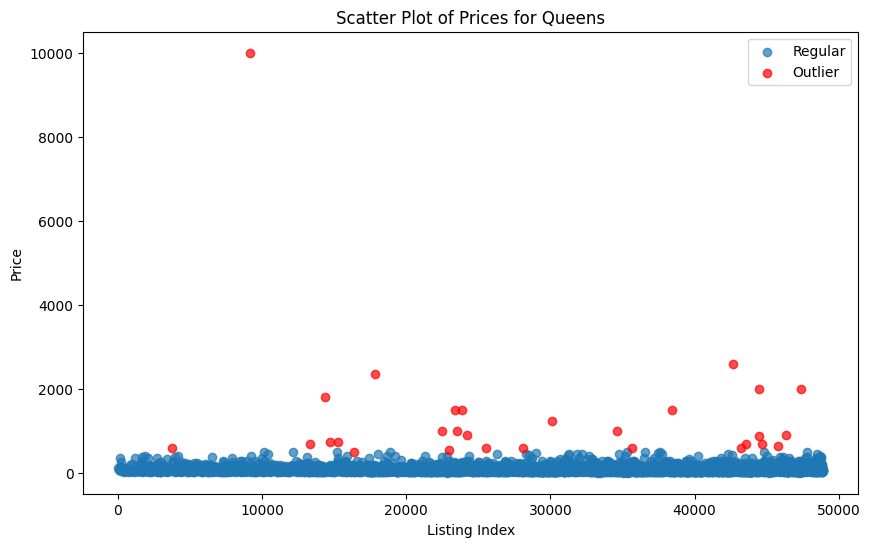

Scatter plot displayed for Queens neighborhood group.


C:\Users\JJATHAR\AppData\Local\Temp\ipykernel_17604\2409718020.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_group_df.loc[:, 'outlier'] = model.predict(X)


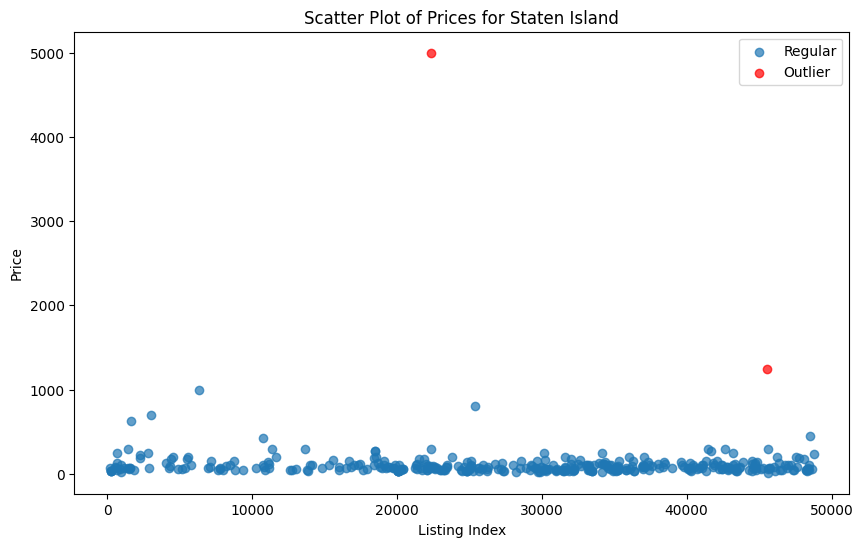

Scatter plot displayed for Staten Island neighborhood group.


C:\Users\JJATHAR\AppData\Local\Temp\ipykernel_17604\2409718020.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_group_df.loc[:, 'outlier'] = model.predict(X)


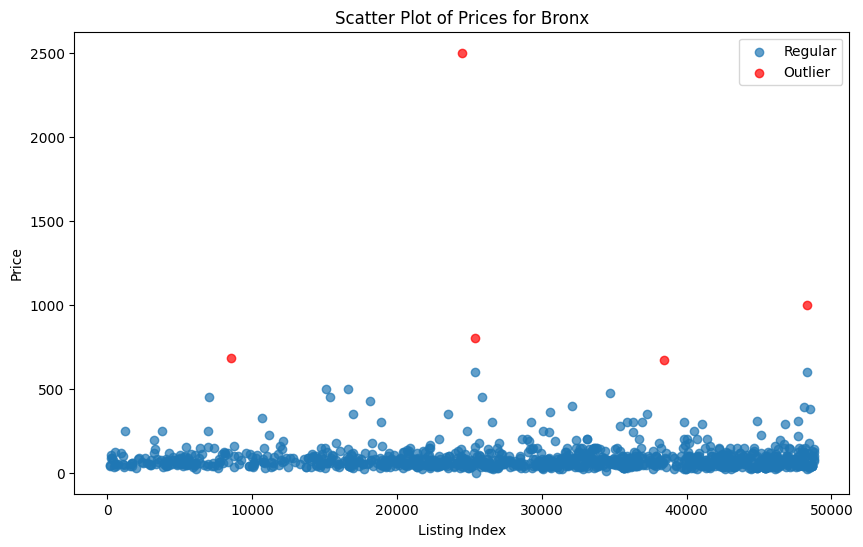

Scatter plot displayed for Bronx neighborhood group.
Scatter plots displayed for all neighborhood groups.


In [43]:
import snowflake.connector
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Connect to Snowflake and fetch data
conn = snowflake.connector.connect(
    user='rutikekre',
    password='Capgemini@123',
    account='xx49197.ap-southeast-1',
    warehouse='hackathon',
    database='airbnb',
    schema='airbnb_schema'
)

# Specify the query to fetch all columns
query = "SELECT * FROM newyork_data"
df = pd.read_sql(query, conn)

# Check if the dataset is not empty
if not df.empty:
    # Get unique neighborhood groups
    unique_neighborhood_groups = df['NEIGHBOURHOOD_GROUP'].unique()

    # Check for anomalies and display scatter plots
    for specific_neighborhood_group in unique_neighborhood_groups:
        # Filter data for the specific neighborhood group
        specific_group_df = df[df['NEIGHBOURHOOD_GROUP'] == specific_neighborhood_group]

        # Check if the dataset is not empty
        if not specific_group_df.empty:
            # Use Isolation Forest to identify outliers (overpriced hotels)
            X = specific_group_df[['PRICE']]
            model = IsolationForest(contamination=0.005)  # Adjust contamination based on your criteria
            model.fit(X)
            specific_group_df.loc[:, 'outlier'] = model.predict(X)

            # Check if there are outliers
            if -1 in specific_group_df['outlier'].values:
                # Save the anomalies to a CSV file
                filename = f'anomalies_{specific_neighborhood_group}.csv'
                specific_group_df.to_csv(filename, index=False)

                # Display a scatter plot with outliers highlighted
                plt.figure(figsize=(10, 6))
                plt.scatter(specific_group_df[specific_group_df['outlier'] == 1].index,
                            specific_group_df.loc[specific_group_df['outlier'] == 1, 'PRICE'],
                            label='Regular', alpha=0.7)
                plt.scatter(specific_group_df[specific_group_df['outlier'] == -1].index,
                            specific_group_df.loc[specific_group_df['outlier'] == -1, 'PRICE'],
                            label='Outlier', alpha=0.7, color='red')
                plt.title(f'Scatter Plot of Prices for {specific_neighborhood_group}')
                plt.xlabel('Listing Index')
                plt.ylabel('Price')
                plt.legend()
                plt.show()

                print(f'Scatter plot displayed for {specific_neighborhood_group} neighborhood group.')
            else:
                print(f'No anomalies found for {specific_neighborhood_group} neighborhood group.')

        else:
            print(f"No valid samples available for the neighborhood group: {specific_neighborhood_group}")

    print('Scatter plots displayed for all neighborhood groups.')

else:
    print("No data available.")

# Close the Snowflake connection
conn.close()



Sending Email Alerts of all Neighborhood Group 

In [44]:
import snowflake.connector
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
from email.mime.base import MIMEBase
from email import encoders

# Function to send email alerts
def send_email(subject, body, filename=None):
    # Replace these values with your email and SMTP server details
    sender_email = 'ankushmulewar51@gmail.com'
    sender_password = 'clzv saju jssm ntzk'
    receiver_email = 'jayantjathar2000@gmail.com'
    smtp_server = 'smtp.gmail.com'
    smtp_port = 587

    # Create the MIME object
    msg = MIMEMultipart()
    msg['From'] = sender_email
    msg['To'] = receiver_email
    msg['Subject'] = subject

    # Attach the email body
    msg.attach(MIMEText(body, 'plain'))

    # Attach the CSV file, if provided
    if filename:
        attachment = open(filename, "rb")
        part = MIMEBase('application', 'octet-stream')
        part.set_payload((attachment).read())
        encoders.encode_base64(part)
        part.add_header('Content-Disposition', "attachment; filename= %s" % filename)
        msg.attach(part)

    # Set up the SMTP server
    server = smtplib.SMTP(smtp_server, smtp_port)
    server.starttls()
    server.login(sender_email, sender_password)

    # Send the email
    server.sendmail(sender_email, receiver_email, msg.as_string())

    # Close the SMTP server connection
    server.quit()

# Connect to Snowflake and fetch data
conn = snowflake.connector.connect(
    user='rutikekre',
    password='Capgemini@123',
    account='xx49197.ap-southeast-1',
    warehouse='hackathon',
    database='airbnb',
    schema='airbnb_schema'
)

# Specify the query to fetch all columns
query = "SELECT * FROM newyork_data"
df = pd.read_sql(query, conn)

# Check if the dataset is not empty
if not df.empty:
    # Get unique neighborhood groups
    unique_neighborhood_groups = df['NEIGHBOURHOOD_GROUP'].unique()

    # Check for anomalies and send alerts
    for specific_neighborhood_group in unique_neighborhood_groups:
        # Filter data for the specific neighborhood group
        specific_group_df = df[df['NEIGHBOURHOOD_GROUP'] == specific_neighborhood_group]

        # Check if the dataset is not empty
        if not specific_group_df.empty:
            # Use Isolation Forest to identify outliers (overpriced hotels)
            X = specific_group_df[['PRICE']]
            model = IsolationForest(contamination=0.005)  # Adjust contamination based on your criteria
            model.fit(X)
            specific_group_df.loc[:, 'outlier'] = model.predict(X)

            # Check if there are outliers
            if -1 in specific_group_df['outlier'].values:
                # Save the anomalies to a CSV file
                filename = f'anomalies_{specific_neighborhood_group}.csv'
                specific_group_df[specific_group_df['outlier'] == -1].to_csv(filename, index=False)

                # Send an email alert with the CSV file attached
                subject = f'Alert: Anomalies Detected in {specific_neighborhood_group} Neighborhood Group'
                body = f'The algorithm has detected anomalies in the prices for {specific_neighborhood_group} neighborhood group. Please check the data.'
                send_email(subject, body, filename)

                print(f'Email sent for {specific_neighborhood_group} neighborhood group.')

        else:
            print(f"No valid samples available for the neighborhood group: {specific_neighborhood_group}")

    print('All emails have been sent.')

else:
    print("No data available.")

# Close the Snowflake connection
conn.close()



C:\Users\JJATHAR\AppData\Local\Temp\ipykernel_17604\1783737334.py:61: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
C:\Users\JJATHAR\AppData\Local\Temp\ipykernel_17604\1783737334.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_group_df.loc[:, 'outlier'] = model.predict(X)


Email sent for Brooklyn neighborhood group.


C:\Users\JJATHAR\AppData\Local\Temp\ipykernel_17604\1783737334.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_group_df.loc[:, 'outlier'] = model.predict(X)


Email sent for Manhattan neighborhood group.


C:\Users\JJATHAR\AppData\Local\Temp\ipykernel_17604\1783737334.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_group_df.loc[:, 'outlier'] = model.predict(X)


Email sent for Queens neighborhood group.


C:\Users\JJATHAR\AppData\Local\Temp\ipykernel_17604\1783737334.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_group_df.loc[:, 'outlier'] = model.predict(X)


Email sent for Staten Island neighborhood group.


C:\Users\JJATHAR\AppData\Local\Temp\ipykernel_17604\1783737334.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_group_df.loc[:, 'outlier'] = model.predict(X)


Email sent for Bronx neighborhood group.
All emails have been sent.
